# Week 07: Linear and logistic regression
### Introduction

This week, we will get some first-hand experience with regression.
We will implement gradient descent for linear regression. Then we will proceed to classification, first by using linear regression and then logistic regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## NumPy
We will first familiarize ourselves a little with NumPy. A function which we will use over again is `linspace(x1,x2,N)` which makes a vector of length $N$ splitting the interval $[x1,x2]$ into equally sized intervals.

In [4]:
xx = np.linspace(-5,5,100)
xx[:10]

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909])

One of the major improvements from using NumPy is the possibilty of computing many values by applying a function to a numpy array.

In [5]:
y1 = -6*xx**3 + xx**2 -3*xx + 5

`y1`will contain the corresponding function values for each element `x`in `xx`. We may plot the result.

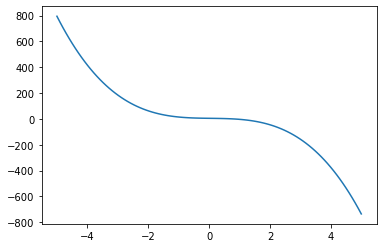

In [6]:
plt.plot(xx,y1)

## Dataset for linear regression
we will start with a smooth curve and add some "noise". The underlying idea is that the smooth curve represents the function we are looking for, and that this is the best we can hope to learn. A solution which does better  on the training material than the smooth curve is probably overfit and will not generalize as well to new data as the smooth curve. We are using a normal distribution to generate noise. The numpy function `normal` will generate a vector of `size` many random points around `loc` from a distribution with standard deviation `scale`.

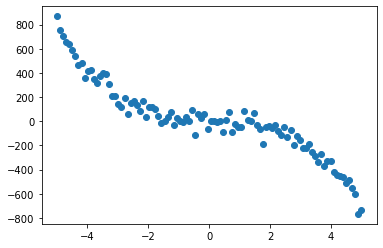

In [7]:
from numpy.random import normal
t = y1 + normal(loc=0, scale=50, size=100)
plt.scatter(xx, t)

Our training data now consists of pairs (xx[i], t[i]), where xx[i] is the datapoint and t[i] the target value. So far, both `xx` and `t` are vectors. Check their shapes, e.g., `xx.shape`. The goal is to make an implementation for linear regression which works with an arbitrary number of input variables and not just one. We will therefore transform `xx` to a matrix of dimension $M\times n$ where each row represents one datapoint, and n is the number of input variables (or features). Check the shape of `X` after the transform.

In [8]:
X = xx.reshape(-1,1)

#### Solution

In [9]:
xx.shape

(100,)

In [10]:
X.shape

(100, 1)

#### End of solution

## Part A: Linear regression

We will implement our own linear regression model. Our aim is to find an approximate function that fits the data generated above.

Since we are dealing with only one input variable, we start with a simple linear function, $f(x_1) = w_0 + w_1x_1$.

### Exercise 1: MSE

We wonder if our $f$ fits the data well, and what parameters will give us the best approximation. We will estimate this using the Mean Squared Error:

$\frac{1}{N} \sum_{j=1}^{N} (t_j - \sum_{i=0}^{m} w_ix_{ji})^2$

Write a function calculating MSE of our approximation.

In [9]:
# Your code here

#### solution

In [11]:
def mse(y, y_pred):
    sum_errors = 0.
    for i in range(0,len(y)):
        sum_errors += (y[i] - y_pred[i])**2
    mean_squared_error = sum_errors/len(y)
    return mean_squared_error

In [12]:
# Vector form solution
def mse_2(x,y):
    return sum((x - y)**2) /x.shape[0]

#### end of solution

### Exercise 2: Testing the MSE
To test our implementation, we can take the function $f(x_1)=0$ as a baseline and calculate the MSE for this $f$. Also calculate the Root Means Square Error which provides a more natural measure for how good the fit is.

#### Solution

In [13]:
hypothesis = np.array([0 for x in xx])
mse = mse_2(hypothesis, t)
print("MSE: ", mse)

MSE:  94438.22440240989


In [14]:
print("RMSE: ", np.sqrt(mse))

RMSE:  307.30802853555565


#### End of solution

### Exercise 3: Adding bias

We will implement linear regression with gradient descent and test it on the data. To make it simple, we will add a $x_0=1$ to all our datapoints, and consider $f(x_1) = w_0 + w_1x_1$ as $f(x_0, x_1) = w_0x_0+ w_1x_1$. Make a procedure that does this.

In [15]:
def add_bias(X):
    """X is a Nxm matrix: N datapoints, m features
    Return a Nx(m+1) matrix with added bias in position zero"""
    pass

#### solution

In [16]:
def add_bias(X):
    """X is a Nxm matrix: N datapoints, m features
    Return a Nx(m+1) matrix with added bias in position zero"""
    sh = X.shape
    m = sh[0]
    bias = np.ones((m,1)) # Make a m*1 matrix of 1-s
    # Concatenate the column of bias in front of the columns of X.
    return np.concatenate((bias, X), axis  = 1) 


#### end  of solution

### Exrcise 4: Gradient Descent
We will implement the linear regression in a class as we did with the classifiers earlier. The fit method will run the gradient descent step a number of times to train the classifier. The predict method should take a matrix containing several data points and predict the outcome for all of them. Fill in the methods.

Assume that the matrix of training data are not extended with bias features. Hence, make adding bias a part of your methods.

After training there should be an attribute with learned coeffecients (weights) which is applied by the predict method.


In [17]:
class NumpyLinReg():

    def fit(self, X_train, t_train, eta = 0.1, epochs=10):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        
    
    def predict(self, X):
        """X is a Kxm matrix for some K>=1
        predict the value for each point in X"""
        pass


#### solution

In [18]:
class NumpyLinReg():

    def fit(self, X_train, t_train, eta = 0.1, epochs=10):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        
        (N, m) = X_train.shape
        X_train = add_bias(X_train)
        
        self.weights = weights = np.zeros(m+1)
        
        for e in range(epochs):
            weights -= eta / N *  X_train.T @ (X_train @ weights - t_train)      
    
    def predict(self, X):
        """X is a Kxm matrix for some K>=1
        predict the value for each point in X"""
        Z = add_bias(X)
        return Z @ self.weights

#### end of solution

### Exercise 5: Train and test the model
Fit the model to the training data. Report the coefficients. Plot the line together with the observations. Calculate the RMSE. Is the result a better fit than the baseline constant function $f(x)=0$.

#### solution

In [20]:
reg = NumpyLinReg()
reg.fit(X,t, epochs=100)
print("The coefficients: ", reg.weights)

The coefficients:  [ 16.47236947 -96.93654075]


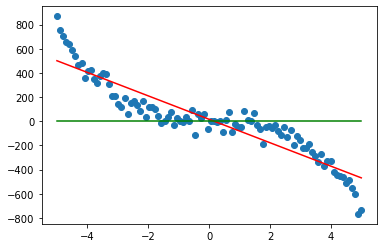

In [21]:
plt.plot(X, reg.weights[0]+reg.weights[1]*X, color="r")
plt.plot(X, [0 for i in X], 'g')

# The generated dataset
plt.scatter(X, t)

In [24]:
error = mse_2(t, add_bias(X) @ reg.weights)
print("MSE: ", error)

MSE:  14279.161752154087


In [25]:
print("RMSE :", np.sqrt(error))

RMSE : 119.49544657498079


It has improved

#### end of solution

## Dataset for classification
We will use simple synthetic data similarly to week_05, but we will make the set a little bigger  to get more reliable results.

In [26]:
from sklearn.datasets import make_blobs
X_train, y_train = make_blobs(n_samples=500, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2019)
X_test, y_test = make_blobs(n_samples=500, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2020)

In [27]:
def show(X, y, marker='.'):
    labels = set(y)
    for lab in labels:
        plt.plot(X[y == lab][:, 1], X[y == lab][:, 0],
                 marker, label="class {}".format(lab))
    plt.legend()

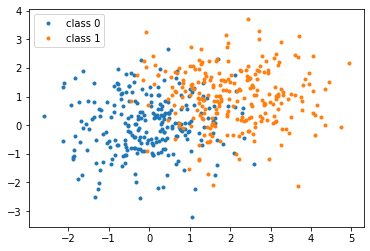

In [28]:
show(X_train, y_train)

## Linear Regression classifier
This is also called Ridge Classifier in the literature when it is smoothed. We will consider the simple unsmoothed version here and return to smoothing and regularization in a later lecture.

### Exercise 6: Coding the classifier
Make a linear regression classifier.

#### Solution

In [29]:
def add_bias(X):
    # Put bias in position 0
    sh = X.shape
    if len(sh) == 1:
        #X is a vector
        return np.concatenate([np.array([1]), X])
    else:
        # X is a matrix
        m = sh[0]
        bias = np.ones((m,1)) # Makes a m*1 matrix of 1-s
        return np.concatenate([bias, X], axis  = 1) 

In [30]:
class NumpyClassifier():
    """Common methods to all numpy classifiers --- if any"""
    
    def accuracy(self,X_test, y_test, **kwargs):
        pred = self.predict(X_test, **kwargs)
        if len(pred.shape) > 1:
            pred = pred[:,0]
        return sum(pred==y_test)/len(pred)

In [32]:
class NumpyLinRegClass(NumpyClassifier):

    def fit(self, X_train, t_train, eta = 0.1, epochs=10):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        
        (k, m) = X_train.shape
        X_train = add_bias(X_train)
        
        self.weights = weights = np.zeros(m+1)
        
        for e in range(epochs):
            weights -= eta / k *  X_train.T @ (X_train @ weights - t_train)      
    
    def predict(self, x, threshold=0.5):
        z = add_bias(x)
        score = z @ self.weights
        return score>threshold

#### End of solution

### Exercise 7: Experiment
We will conduct repeated testing. We therefore need a development test set different from the final test set. Make such a set X_dev, y_dev, similarly to X_test, y_test using random_state=2021. Train the classfier on X_train, y_train and test for accuracy on X_dev, y_dev.

#### Solution

In [33]:
X_dev, y_dev = make_blobs(n_samples=500, centers=[[0,0],[1,2]], 
                  n_features=2, random_state=2021)

In [35]:
lin_cl = NumpyLinRegClass()
lin_cl.fit(X_train, y_train)
lin_cl.accuracy(X_dev, y_dev)

0.864

#### End of solution

## Logistic Regression

### Exercise 8: The logistic function
Implement the logistic function. Sometimes called only the sigmoid.

In [36]:
def logistic(x):
    # fill in the rest
    pass

#### Solution

In [37]:
def logistic(x):
    return 1/(1+np.exp(-x))

#### End of solution

### Exercise 9: Code for the classifier
Write code for the logistic regression classifier. Compared to linear regression classifier you have to make adaptions to both fit and predict taking the logistic into consideration


#### Solution

In [39]:
class NumpyLogReg(NumpyClassifier):

    def fit(self, X_train, t_train, eta = 0.1, epochs=10):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        
        (k, m) = X_train.shape
        X_train = add_bias(X_train)
        
        self.weights = weights = np.zeros(m+1)
        
        for e in range(epochs):
            weights -= eta / k *  X_train.T @ (self.forward(X_train) - t_train)      
    
    def forward(self, X):
        return logistic(X @ self.weights)
    
    def score(self, x):
        z = add_bias(x)
        score = self.forward(z)
        return score
    
    def predict(self, x, threshold=0.5):
        z = add_bias(x)
        score = self.forward(z)
        return (score>threshold).astype('int')

#### End of solution

### Exercise 10: Initial experiments
Train the classfier on X_train, y_train and test for accuracy on X_dev, y_dev.

#### Solution

In [40]:
lr_cl = NumpyLogReg()
lr_cl.fit(X_train, y_train)
lr_cl.accuracy(X_dev, y_dev)

0.752

#### End of solution

### Exercise 11: Repeated experimentation
Did you get better results than with the linear regression classifier? That does not necessary have to be the case for this data set. But, if your result is much inferior to the linear regression classifier, the reason might be the parameter settings. Experiment with the parameter values for the learning rate and the number of epochs to get an optimal result.

#### Solution

In [41]:
for e in [1, 2, 5, 10, 50, 100, 1000, 10000, 100000]:
    lr_cl = NumpyLogReg()
    lr_cl.fit(X_train, y_train, epochs=e)
    print("Learning rate: {}  Epochs: {:7}  Accuracy: {}".format(
        0.1, e, lr_cl.accuracy(X_dev, y_dev)))

Learning rate: 0.1  Epochs:       1  Accuracy: 0.74
Learning rate: 0.1  Epochs:       2  Accuracy: 0.742
Learning rate: 0.1  Epochs:       5  Accuracy: 0.744
Learning rate: 0.1  Epochs:      10  Accuracy: 0.752
Learning rate: 0.1  Epochs:      50  Accuracy: 0.818
Learning rate: 0.1  Epochs:     100  Accuracy: 0.842
Learning rate: 0.1  Epochs:    1000  Accuracy: 0.87
Learning rate: 0.1  Epochs:   10000  Accuracy: 0.874
Learning rate: 0.1  Epochs:  100000  Accuracy: 0.874


In [42]:
for eta in [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]:
    lr_cl = NumpyLogReg()
    lr_cl.fit(X_train, y_train, epochs=1000, eta = eta)
    print("Learning rate: {:7}  Epochs: {:4}  Accuracy: {}".format(
        eta, 1000, lr_cl.accuracy(X_dev, y_dev)))

Learning rate:       1  Epochs: 1000  Accuracy: 0.874
Learning rate:     0.1  Epochs: 1000  Accuracy: 0.87
Learning rate:    0.01  Epochs: 1000  Accuracy: 0.842
Learning rate:   0.001  Epochs: 1000  Accuracy: 0.76
Learning rate:  0.0001  Epochs: 1000  Accuracy: 0.742
Learning rate:   1e-05  Epochs: 1000  Accuracy: 0.74


In [36]:
for e in [1, 2, 5, 10, 50, 100, 1000, 10000, 100000, 1000000]:
    lr_cl = NumpyLogReg()
    lr_cl.fit(X_train, y_train, epochs=e, eta=0.0001)
    print("Learning rate: {:7}  Epochs: {:8}  Accuracy: {}".format(
        0.001, e, lr_cl.accuracy(X_dev, y_dev)))

Learning rate:   0.001  Epochs:        1  Accuracy: 0.74
Learning rate:   0.001  Epochs:        2  Accuracy: 0.74
Learning rate:   0.001  Epochs:        5  Accuracy: 0.74
Learning rate:   0.001  Epochs:       10  Accuracy: 0.74
Learning rate:   0.001  Epochs:       50  Accuracy: 0.74
Learning rate:   0.001  Epochs:      100  Accuracy: 0.74
Learning rate:   0.001  Epochs:     1000  Accuracy: 0.742
Learning rate:   0.001  Epochs:    10000  Accuracy: 0.76
Learning rate:   0.001  Epochs:   100000  Accuracy: 0.842
Learning rate:   0.001  Epochs:  1000000  Accuracy: 0.87


In [37]:
for e in [1, 2, 5, 10, 50, 100, 1000, 10000, 100000, 1000000]:
    lr_cl = NumpyLogReg()
    lr_cl.fit(X_train, y_train, epochs=e, eta=0.0001)
    print("Learning rate: {:7}  Epochs: {:8}  Accuracy: {}".format(
        0.01, e, lr_cl.accuracy(X_dev, y_dev)))

Learning rate:    0.01  Epochs:        1  Accuracy: 0.74
Learning rate:    0.01  Epochs:        2  Accuracy: 0.74
Learning rate:    0.01  Epochs:        5  Accuracy: 0.74
Learning rate:    0.01  Epochs:       10  Accuracy: 0.74
Learning rate:    0.01  Epochs:       50  Accuracy: 0.74
Learning rate:    0.01  Epochs:      100  Accuracy: 0.74
Learning rate:    0.01  Epochs:     1000  Accuracy: 0.742
Learning rate:    0.01  Epochs:    10000  Accuracy: 0.76
Learning rate:    0.01  Epochs:   100000  Accuracy: 0.842
Learning rate:    0.01  Epochs:  1000000  Accuracy: 0.87


#### End of solution

## End of week 07